In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import matplotlib as mpl


In [2]:
df = pd.read_csv("data/AI_raw_data.txt",header = 0, delimiter = '\t' )

# Data Prep

In [3]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.
0,"Sat, 03 Dec 2016","AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN
1,"Sat, 26 Nov 2016","AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN
2,"Sat, 26 Nov 2016",AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN
3,"Sat, 26 Nov 2016",AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN
4,"Sat, 26 Nov 2016",AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN


In [4]:
df['Home Team'], df['Away Team'] = df['Match'].str.split('v').str

In [5]:
df['Home Score'], df['Away Score'] = df['Score'].str.split('-').str
df['Home Tries'], df['Away Tries'] = df['Tries'].str.split(':').str

In [6]:
df['Home Team'] = df['Home Team'].map(lambda x: x.strip())

In [7]:
df['Away Team'] = df['Away Team'].map(lambda x: x.strip())

In [8]:
df[['Home Score', 'Away Score', 'Home Tries', 'Away Tries']] = df[['Home Score', 'Away Score', 'Home Tries', 'Away Tries']].apply(pd.to_numeric)

In [9]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries
0,"Sat, 03 Dec 2016","AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN,ENG,AUS,37,21,4,2
1,"Sat, 26 Nov 2016","AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN,FRA,NZL,19,24,1,3
2,"Sat, 26 Nov 2016",AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN,IRE,AUS,27,24,3,3
3,"Sat, 26 Nov 2016",AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN,WAL,SAF,27,13,2,1
4,"Sat, 26 Nov 2016",AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN,ENG,ARG,27,14,2,2


In [10]:
df['Home Win'] = df['Home Score'] > df['Away Score']

In [11]:
df['Winner'] = np.where(df['Home Win'], df['Home Team'], df['Away Team'])

In [12]:
df['Margin'] = abs(df['Home Score'] - df['Away Score'])

In [13]:
df.loc[df['Margin']==0, 'Winner'] = 'Draw'

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
0,2016-12-03,"AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN,ENG,AUS,37,21,4,2,True,ENG,16
1,2016-11-26,"AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN,FRA,NZL,19,24,1,3,False,NZL,5
2,2016-11-26,AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN,IRE,AUS,27,24,3,3,True,IRE,3
3,2016-11-26,AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN,WAL,SAF,27,13,2,1,True,WAL,14
4,2016-11-26,AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN,ENG,ARG,27,14,2,2,True,ENG,13


In [16]:
df.to_csv("data/AI_processed.csv", index = False)

# Analysis


## Number of matches a year

In [17]:
df['Date'].min()

Timestamp('1973-11-10 00:00:00')

In [18]:
df['Date'].max()

Timestamp('2016-12-03 00:00:00')

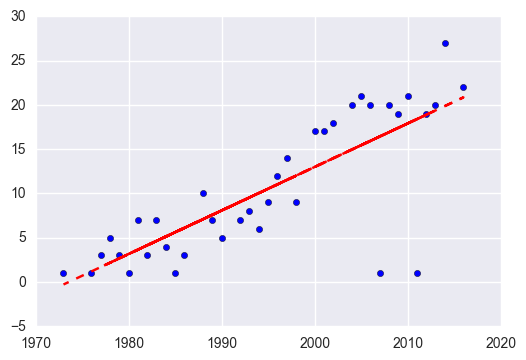

In [19]:
#testing trendline
x = df['Date'].dt.year.value_counts().index
y = df['Date'].dt.year.value_counts().values
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

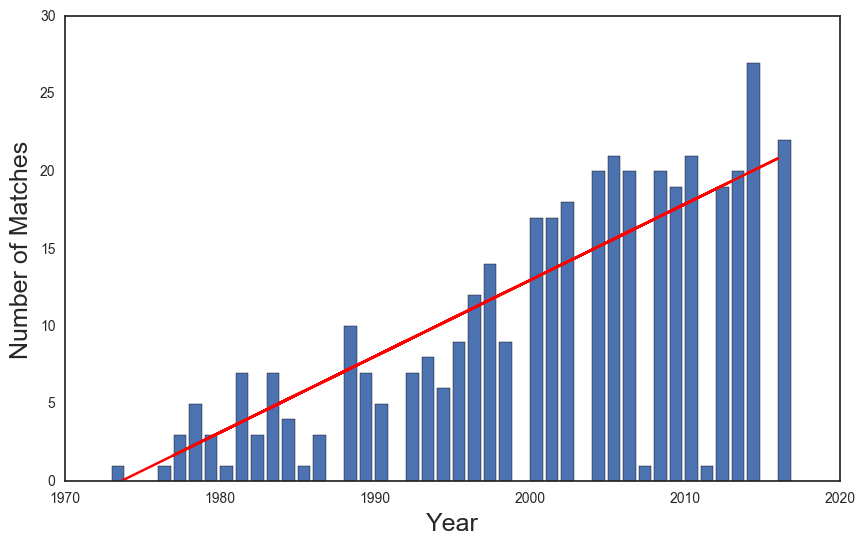

In [64]:
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.plot(x,p(x),"r-")
plt.ylim(0,30)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of Matches', fontsize =18)
plt.savefig('figures\matches_per_year.png')
plt.show()

## Overall Results

In [21]:
df['Home Win'].sum()

194

In [22]:
len(df)-df['Home Win'].sum()

195

In [23]:
len(df[df['Winner']=='Draw'])

9

In [24]:
len(df)-df['Home Win'].sum() -len(df[df['Winner']=='Draw'])

186

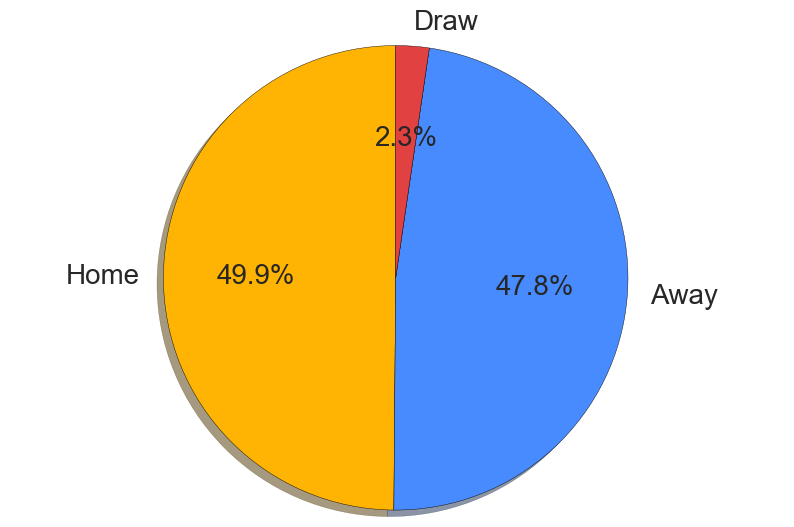

In [62]:
labels = 'Home', 'Away','Draw'
sizes = [df['Home Win'].sum(), len(df)-df['Home Win'].sum() -len(df[df['Winner']=='Draw']), len(df[df['Winner']=='Draw'])]
explode = (0, 0, 0.3,)
mpl.rcParams['font.size'] = 20
fig1, ax1 = plt.subplots(figsize=(10,6))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f% %',
shadow=True, startangle=90,colors=['#ffb302','#488bff','#e24141'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("Match results")
texts[0].set_fontsize(20), texts[1].set_fontsize(20), texts[2].set_fontsize(20)
plt.savefig('figures/results.png')
plt.show()

## Winning Margin

In [26]:
df['Margin'].median()

14.0

In [27]:
sns.set_style("white")

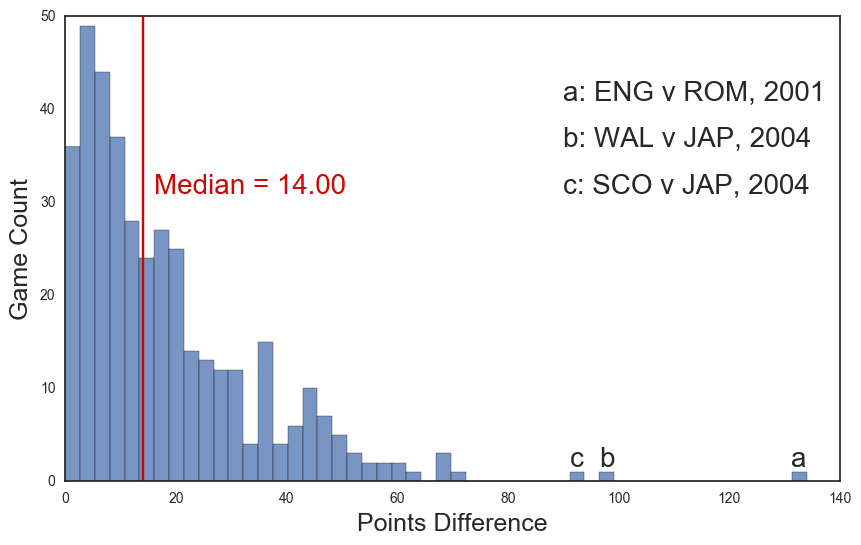

In [63]:
plt.figure(figsize=(10,6))
plt.hist(df['Margin'], bins = 50, alpha = 0.75)
#plt.title('Winning Margin Distribution', fontsize=20)
plt.xlabel('Points Difference', fontsize=18)
plt.ylabel('Game Count', fontsize=18)
#plt.axvline(df['Margin'].mean())
#plt.text(20,41,'Mean = {0:.2f}'.format(df['Margin'].mean()))
plt.axvline(df['Margin'].median(), color='#cc0606')
plt.text(16,31,'Median = {0:.2f}'.format(df['Margin'].median()), color='#cc0606')
plt.text(90,41, "a: ENG v ROM, 2001")
plt.text(90,36, "b: WAL v JAP, 2004")
plt.text(90,31, "c: SCO v JAP, 2004")
plt.text(91.2,1.6,"c")
plt.text(96.5,1.6,"b")
plt.text(131.2,1.6,"a")
#plt.axvline(df['Margin'].median())
plt.savefig('figures\magin_dist.png')
plt.show()

In [29]:
margin_group = df['Margin'].groupby(df['Home Win'])

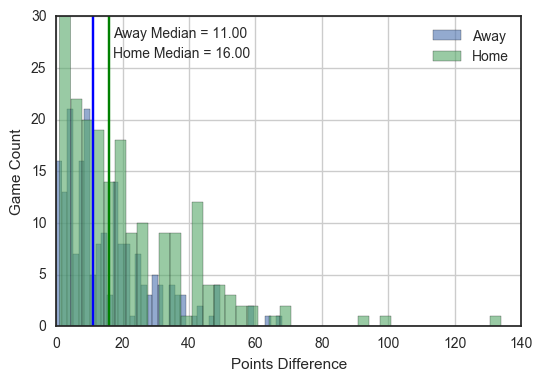

In [30]:
margin_group.hist(alpha=0.6, bins = 40)
#plt.figure(figsize=(10,6))
#plt.title('Winning Margin Distribution')
plt.xlabel('Points Difference')
plt.ylabel('Game Count')
plt.legend(['Away', 'Home'])
plt.axvline(margin_group.median()[1], color = 'g')
plt.text(17,26,'Home Median = {0:.2f}'.format(margin_group.median()[1]))
plt.axvline(margin_group.median()[0])
plt.text(17,28,'Away Median = {0:.2f}'.format(margin_group.median()[0]))
plt.show()

In [31]:
df['Margin'].max()

134

In [32]:
df[df['Margin'] == df['Margin'].max()]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
237,2001-11-17,AI,NaN,ENG v ROM,134-0,20:0,5-0,"Twickenham, London",NaN,ENG,ROM,134,0,20,0,True,ENG,134


In [33]:
df[df['Margin'] >80]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
196,2004-11-26,AI,NaN,WAL v JAP,98-0,14:0,5-0,"Millennium Stadium, Cardiff",NaN,WAL,JAP,98,0,14,0,True,WAL,98
204,2004-11-13,AI,NaN,SCO v JAP,100-8,15:1,5-0,"McDiarmid Park, Perth_SCO",NaN,SCO,JAP,100,8,15,1,True,SCO,92
237,2001-11-17,AI,NaN,ENG v ROM,134-0,20:0,5-0,"Twickenham, London",NaN,ENG,ROM,134,0,20,0,True,ENG,134


### Draws

In [34]:
df[df['Winner'] =='Draw']

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
100,2010-11-19,AI,NaN,WAL v FIJ,16-16,1:1,2-2,"Millennium Stadium, Cardiff",NaN,WAL,FIJ,16,16,1,1,False,Draw,0
121,2009-11-15,AI,NaN,IRE v AUS,20-20,2:2,2-2,"Croke Park, Dublin",NaN,IRE,AUS,20,20,2,2,False,Draw,0
169,2006-11-04,AI,NaN,WAL v AUS,29-29,2:4,2-3,"Millennium Stadium, Cardiff",NaN,WAL,AUS,29,29,2,4,False,Draw,0
218,2002-11-16,"AI,DG",NaN,FRA v NZL,20-20,2:2,2-2,"Stade de France, Paris",NaN,FRA,NZL,20,20,2,2,False,Draw,0
273,1997-12-06,AI,2,ENG v NZL,26-26,3:2,2-2,"Twickenham, London",NaN,ENG,NZL,26,26,3,2,False,Draw,0
282,1997-11-15,"AI,CC",a,ENG v AUS,15-15,0:2,2-2,"Twickenham, London",NaN,ENG,AUS,15,15,0,2,False,Draw,0
300,1995-11-18,AI,NaN,SCO v SAM,15-15,0:2,2-2,"Murrayfield, Edinburgh",NaN,SCO,SAM,15,15,0,2,False,Draw,0
361,1983-11-13,AI,NaN,FRA v AUS,15-15,0:1,2-2,Clermont Ferrand,NaN,FRA,AUS,15,15,0,1,False,Draw,0
363,1983-11-12,AI,NaN,SCO v NZL,25-25,1:3,2-2,"Murrayfield, Edinburgh",NaN,SCO,NZL,25,25,1,3,False,Draw,0


### Winning Score vs Num Tries

In [35]:
df_no_draws = df[df['Winner'] !='Draw']

In [36]:
#home wins when home team has most tries
a = df_no_draws[(df_no_draws['Home Tries'] > df_no_draws['Away Tries']) & df_no_draws['Home Win']]

In [37]:
#away wins when away team has most tries
b= df_no_draws[(df_no_draws['Home Tries'] < df_no_draws['Away Tries']) & (df_no_draws['Home Win']== False)]

In [38]:
#equal number of tries
c = df_no_draws[(df_no_draws['Home Tries'] == df_no_draws['Away Tries']) ]

Winning with less tries

In [70]:
100 - (len(a) + len(b) + len(c) + len(df)-len(df_no_draws)) / len(df)*100

6.6838046272493585

Winning with most tries 

In [68]:
(len(a) + len(b))/len(df)*100

75.32133676092545

In [74]:
len(df[df['Winner'] =='Draw']) / len(df)*100

2.313624678663239

Equal tries

In [75]:
len(c) / len(df)*100

15.681233933161954

In [80]:
c['Winner'].value_counts()

FRA    11
ENG    11
WAL     8
SAF     6
IRE     5
AUS     5
SCO     4
ARG     4
NZL     3
CAN     2
ITA     1
ROM     1
Name: Winner, dtype: int64

In [81]:
c['Home Win'].value_counts()

True     41
False    20
Name: Home Win, dtype: int64

In [78]:
#sanity check
6.6838046272493585 + 75.32133676092545+ 2.313624678663239+ 15.681233933161954

100.0

## Winning %

In [43]:
games_played = pd.concat([df['Away Team'], df['Home Team']]).value_counts()

In [44]:
winners = df['Winner'].value_counts()

In [45]:
win_perc = pd.concat([games_played, winners], axis = 1).reset_index()
win_perc.columns = ['Country', 'Games Played', 'Games Won']
win_perc.fillna(0, inplace = True)
win_perc[['Games Played','Games Won']] = win_perc[['Games Played','Games Won']].astype(int)
win_perc = win_perc[win_perc['Country'] != 'Draw'].reset_index()

In [46]:
win_perc['Win Percentage'] = (win_perc['Games Won'] / win_perc['Games Played'])*100

In [47]:
win_perc.sort_values('Win Percentage', ascending = False)

,index,Country,Games Played,Games Won,Win Percentage
11,12,NZL,76,64,84.210526
15,16,SAF,61,39,63.934426
3,4,ENG,68,42,61.764706
7,8,IRE,57,35,61.403509
1,1,AUS,80,49,61.250000
5,6,FRA,76,44,57.894737
13,14,POR,2,1,50.000000
17,18,SCO,57,25,43.859649
20,21,WAL,73,31,42.465753
0,0,ARG,48,17,35.416667


In [48]:
win_perc['Win Percentage'].values

array([ 35.41666667,  61.25      ,  15.78947368,  61.76470588,
         8.33333333,  57.89473684,   0.        ,  61.40350877,
        32.69230769,   0.        ,   0.        ,  84.21052632,
        16.66666667,  50.        ,  10.        ,  63.93442623,
        16.66666667,  43.85964912,  30.76923077,   0.        ,  42.46575342])

In [49]:
win_perc.sort_values('Win Percentage', ascending = False).to_csv("data/win_perc.csv", sep = ',',index = False)

In [50]:
ord_win_perc = win_perc.sort_values('Win Percentage', ascending = False).reset_index()

In [51]:
ord_win_perc.Country.values

array(['NZL', 'SAF', 'ENG', 'IRE', 'AUS', 'FRA', 'POR', 'SCO', 'WAL',
       'ARG', 'ITA', 'TON', 'PAC', 'SAM', 'CAN', 'ROM', 'FIJ', 'JAP',
       'GEO', 'USA', 'NAM'], dtype=object)

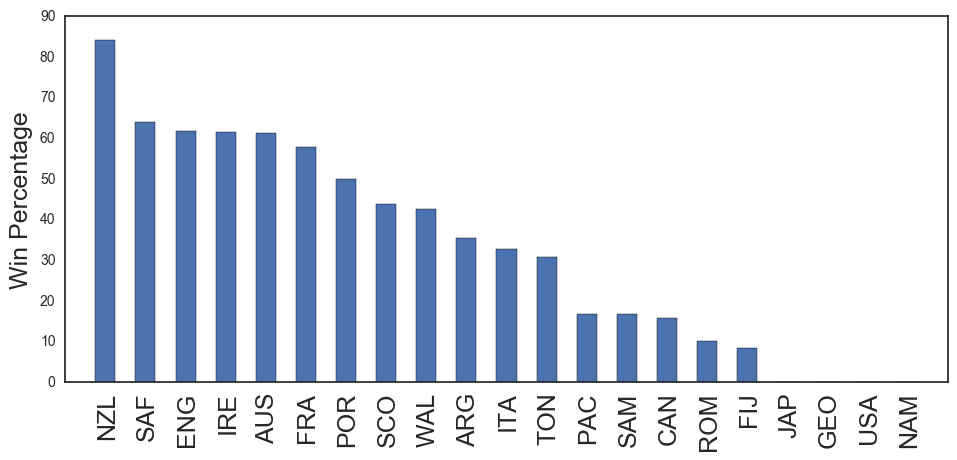

In [92]:
ind = np.arange(len(ord_win_perc))
width = .5
fig, ax = plt.subplots(figsize = (10,5))
rect = ax.bar(ind,ord_win_perc['Win Percentage'].values,width, align='center')
ax.set_xticks(ind+0.05)
plt.xlim(-1, 21)
ax.set_xticklabels(ord_win_perc.Country.values, rotation=90, fontsize=18)
ax.set_ylabel("Win Percentage", fontsize=18)
plt.tight_layout()
plt.savefig('figures/win_perc.png')
plt.show()

In [89]:
ord_win_games = win_perc.sort_values('Games Won', ascending = False).reset_index()
ord_win_games

,level_0,index,Country,Games Played,Games Won,Win Percentage
0,11,12,NZL,76,64,84.210526
1,1,1,AUS,80,49,61.250000
2,5,6,FRA,76,44,57.894737
3,3,4,ENG,68,42,61.764706
4,15,16,SAF,61,39,63.934426
5,7,8,IRE,57,35,61.403509
6,20,21,WAL,73,31,42.465753
7,17,18,SCO,57,25,43.859649
8,0,0,ARG,48,17,35.416667
9,8,9,ITA,52,17,32.692308


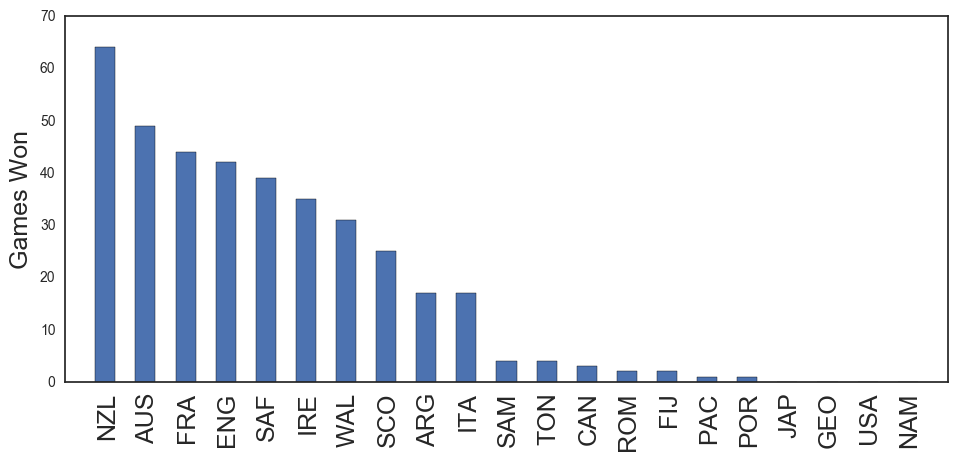

In [91]:
ind = np.arange(len(ord_win_games))
width = .5
fig, ax = plt.subplots(figsize = (10,5))
rect = ax.bar(ind,ord_win_games['Games Won'].values,width, align='center')
ax.set_xticks(ind+0.05)
plt.xlim(-1, 21)
ax.set_xticklabels(ord_win_games.Country.values, rotation=90, fontsize=18)
ax.set_ylabel("Games Won", fontsize=18)
plt.tight_layout()
plt.savefig('figures/win_games.png')
plt.show()

## Focus on a few of this years games

Ireland - SA

England - Australia

Wales - Australia

Ireland - Argentina

Scotland - NZ

Scotland - Australia

Wales - NZ

Wales - SA

### Ireland vs SA 

In [53]:
df[(df['Match'] == 'IRE v SAF') | (df['Match'] == 'SAF v IRE')]['Winner'].value_counts()

IRE    4
SAF    4
Name: Winner, dtype: int64

In [96]:
df[(df['Match'] == 'IRE v SAF') | (df['Match'] == 'SAF v IRE')]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
40,2014-11-08,AI,NaN,IRE v SAF,29-15,2:2,4-0,"Lansdowne Rd, Dublin",NaN,IRE,SAF,29,15,2,2,True,IRE,14
83,2012-11-10,AI,NaN,IRE v SAF,12-16,0:1,1-4,"Lansdowne Rd, Dublin",NaN,IRE,SAF,12,16,0,1,False,SAF,4
107,2010-11-06,AI,NaN,IRE v SAF,21-23,2:2,1-4,"Lansdowne Rd, Dublin",NaN,IRE,SAF,21,23,2,2,False,SAF,2
113,2009-11-28,AI,NaN,IRE v SAF,15-10,0:1,4-1,"Croke Park, Dublin",NaN,IRE,SAF,15,10,0,1,True,IRE,5
163,2006-11-11,AI,NaN,IRE v SAF,32-15,4:2,5-0,"Lansdowne Rd, Dublin",NaN,IRE,SAF,32,15,4,2,True,IRE,17
206,2004-11-13,AI,NaN,IRE v SAF,17-12,1:0,4-1,"Lansdowne Rd, Dublin",NaN,IRE,SAF,17,12,1,0,True,IRE,5
250,2000-11-19,AI,NaN,IRE v SAF,18-28,2:3,0-4,"Lansdowne Rd, Dublin",NaN,IRE,SAF,18,28,2,3,False,SAF,10
265,1998-11-28,AI,NaN,IRE v SAF,13-27,1:3,0-4,"Lansdowne Rd, Dublin",NaN,IRE,SAF,13,27,1,3,False,SAF,14


Ireland vs SA is very even both teams sharing 4 wins and neither team having won by a margin outside the overall median for AIs

### Ireland vs Argentina

In [97]:
df[(df['Match'] == 'IRE v ARG') | (df['Match'] == 'ARG v IRE')]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
75,2012-11-24,AI,NaN,IRE v ARG,46-24,7:2,5-0,"Lansdowne Rd, Dublin",NaN,IRE,ARG,46,24,7,2,True,IRE,22
89,2010-11-28,AI,NaN,IRE v ARG,29-9,2:0,4-0,"Lansdowne Rd, Dublin",NaN,IRE,ARG,29,9,2,0,True,IRE,20
135,2008-11-22,AI,NaN,IRE v ARG,17-3,1:0,4-0,"Croke Park, Dublin",NaN,IRE,ARG,17,3,1,0,True,IRE,14
192,2004-11-27,AI,NaN,IRE v ARG,21-19,0:1,4-1,"Lansdowne Rd, Dublin",NaN,IRE,ARG,21,19,0,1,True,IRE,2
212,2002-11-23,AI,NaN,IRE v ARG,16-7,1:1,4-0,"Lansdowne Rd, Dublin",NaN,IRE,ARG,16,7,1,1,True,IRE,9
332,1990-10-27,AI,NaN,IRE v ARG,20-18,2:1,4-1,"Lansdowne Rd, Dublin",NaN,IRE,ARG,20,18,2,1,True,IRE,2
388,1973-11-10,AI,NaN,IRE v ARG,21-8,4:2,5-0,"Lansdowne Rd, Dublin",NaN,IRE,ARG,21,8,4,2,True,IRE,13


In [54]:
df[(df['Match'] == 'IRE v ARG') | (df['Match'] == 'ARG v IRE')]['Winner'].value_counts()

IRE    7
Name: Winner, dtype: int64

In [99]:
df[(df['Match'] == 'IRE v ARG') | (df['Match'] == 'ARG v IRE')]['Margin'].mean()

11.714285714285714

Ireland dominant winning all 7 matches played with an average winning margin of approx. 12 points.

### England vs Argentina

In [55]:
df[(df['Match'] == 'ENG v ARG') | (df['Match'] == 'ARG v ENG')]['Winner'].value_counts()

ENG    6
ARG    1
Name: Winner, dtype: int64

In [102]:
df[(df['Match'] == 'ENG v ARG') | (df['Match'] == 'ARG v ENG')]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
4,2016-11-26,AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN,ENG,ARG,27,14,2,2,True,ENG,13
66,2013-11-09,AI,NaN,ENG v ARG,31-12,4:0,5-0,"Twickenham, London",NaN,ENG,ARG,31,12,4,0,True,ENG,19
123,2009-11-14,AI,NaN,ENG v ARG,16-9,1:0,4-1,"Twickenham, London",NaN,ENG,ARG,16,9,1,0,True,ENG,7
166,2006-11-11,AI,NaN,ENG v ARG,18-25,2:1,1-4,"Twickenham, London",NaN,ENG,ARG,18,25,2,1,False,ARG,7
248,2000-11-25,AI,NaN,ENG v ARG,19-0,1:0,4-0,"Twickenham, London",NaN,ENG,ARG,19,0,1,0,True,ENG,19
288,1996-12-14,AI,NaN,ENG v ARG,20-18,1:0,4-1,"Twickenham, London",NaN,ENG,ARG,20,18,1,0,True,ENG,2
330,1990-11-03,AI,NaN,ENG v ARG,51-0,7:0,5-0,"Twickenham, London",NaN,ENG,ARG,51,0,7,0,True,ENG,51


England in charge here as well winning 6 of the 7 matches played

### England vs Australia

In [56]:
df[(df['Match'] == 'ENG v AUS') | (df['Match'] == 'AUS v ENG')]['Winner'].value_counts()

ENG     10
AUS      6
Draw     1
Name: Winner, dtype: int64

In [103]:
df[(df['Match'] == 'ENG v AUS') | (df['Match'] == 'AUS v ENG')]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
0,2016-12-03,"AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN,ENG,AUS,37,21,4,2,True,ENG,16
23,2014-11-29,"AI,CC",e,ENG v AUS,26-17,2:2,4-0,"Twickenham, London",NaN,ENG,AUS,26,17,2,2,True,ENG,9
68,2013-11-02,"AI,CC",e,ENG v AUS,20-13,2:1,4-1,"Twickenham, London",NaN,ENG,AUS,20,13,2,1,True,ENG,7
79,2012-11-17,"AI,CC",NaN,ENG v AUS,14-20,1:1,1-4,"Twickenham, London",NaN,ENG,AUS,14,20,1,1,False,AUS,6
104,2010-11-13,"AI,CC",e,ENG v AUS,35-18,2:2,4-0,"Twickenham, London",NaN,ENG,AUS,35,18,2,2,True,ENG,17
128,2009-11-07,"AI,CC",NaN,ENG v AUS,9-18,0:2,0-4,"Twickenham, London",NaN,ENG,AUS,9,18,0,2,False,AUS,9
139,2008-11-15,"AI,CC",a,ENG v AUS,14-28,1:1,0-4,"Twickenham, London",NaN,ENG,AUS,14,28,1,1,False,AUS,14
187,2005-11-12,"AI,CC",e,ENG v AUS,26-16,2:1,4-0,"Twickenham, London",NaN,ENG,AUS,26,16,2,1,True,ENG,10
193,2004-11-27,"AI,CC",a,ENG v AUS,19-21,3:2,1-4,"Twickenham, London",NaN,ENG,AUS,19,21,3,2,False,AUS,2
222,2002-11-16,"AI,CC",e,ENG v AUS,32-31,2:3,4-1,"Twickenham, London",NaN,ENG,AUS,32,31,2,3,True,ENG,1


England have the head to head here and are on a bit of a roll having won the last three AIs.

### Wales vs Australia

In [57]:
df[(df['Match'] == 'WAL v AUS') | (df['Match'] == 'AUS v WAL')]['Winner'].value_counts()

AUS     11
WAL      3
Draw     1
Name: Winner, dtype: int64

### Wales vs SA

In [58]:
df[(df['Match'] == 'WAL v SAF') | (df['Match'] == 'SAF v WAL')]['Winner'].value_counts()

SAF    10
WAL     2
Name: Winner, dtype: int64

### Wales vs NZ

In [59]:
df[(df['Match'] == 'WAL v NZL') | (df['Match'] == 'NZL v WAL')]['Winner'].value_counts()

NZL    13
Name: Winner, dtype: int64

### Scotland vs NZ, Australia

In [60]:
df[(df['Match'] == 'SCO v NZL') | (df['Match'] == 'NZL v SCO')]['Winner'].value_counts()

NZL     9
Draw    1
Name: Winner, dtype: int64

In [61]:
df[(df['Match'] == 'SCO v AUS') | (df['Match'] == 'AUS v SCO')]['Winner'].value_counts()

AUS    10
SCO     2
Name: Winner, dtype: int64